# Setting enviroment

In [1]:
%load_ext kedro.ipython

[12/26/24 06:56:14] INFO     Using                                                                  ]8;id=104428;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=750006;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/bruno/Documents/Programming/Programming_projects/olist_project/                
                             .venv/lib/python3.11/site-packages/kedro/framework/project/rich_loggin                
                             g.yml' as logging configuration.                                                      

[12/26/24 06:56:15] INFO     Registered line magic '%reload_kedro'                                   ]8;id=911569;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=115833;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=903936;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=795390;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=985340;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=287073;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             /home/bruno/Documents/Programming/Programming_projects/olist_project.                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/26/24 06:57:05] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=433114;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=415092;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/26/24 06:57:06] INFO     Kedro project olist_project                                            ]8;id=606584;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=283419;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=640508;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=692022;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

[12/26/24 06:57:13] INFO     Registered line magic 'run_viz'                                        ]8;id=281540;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=593670;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#151\151]8;;\

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# functions

In [97]:
def cohort_to_date(cohort: pd.Series|int)-> pd.Series:
    if isinstance(cohort, pd.Series):
        return pd.to_datetime(cohort.astype('string'),format='%Y%m')
    elif isinstance(cohort, int):
        return pd.to_datetime(str(cohort),format='%Y%m')
    else:
        raise TypeError()

def date_to_cohort(dt_cohort:pd.Series|pd.Timestamp)-> pd.Series:
    
    if isinstance(dt_cohort, pd.Series):
        return dt_cohort.dt.strftime("%Y%m").astype('Int64')
    elif isinstance(dt_cohort, pd.Timestamp):
        return int(dt_cohort.strftime("%Y%m"))
    else:
        raise TypeError()

def months_between_cohort(cohort_1,cohort_2):
    dt_cohort_1 = cohort_to_date(cohort_1)
    dt_cohort_2 = cohort_to_date(cohort_2.astype('string'))
    return (dt_cohort_2.dt.to_period('M').astype(int) - dt_cohort_1.dt.to_period('M').astype(int))

def list_cohort_between(x, start_cohort_col, end_cohort_col):
    start_dt_cohort = cohort_to_date(x[start_cohort_col])
    end_dt_cohort = cohort_to_date(x[end_cohort_col])
    return [
        date_to_cohort(dt_cohort)
            for dt_cohort in list(pd.date_range(start=start_dt_cohort,end=end_dt_cohort,freq='MS'))
    ]


In [61]:
list(pd.date_range(start='2023-02-01',end='2023-07-01',freq='MS'))


[
    Timestamp('2023-02-01 00:00:00'),
    Timestamp('2023-03-01 00:00:00'),
    Timestamp('2023-04-01 00:00:00'),
    Timestamp('2023-05-01 00:00:00'),
    Timestamp('2023-06-01 00:00:00'),
    Timestamp('2023-07-01 00:00:00')
]

# Load data

In [3]:
df_orders = catalog.load("pre_orders")

[12/26/24 06:57:51] INFO     Loading data from pre_orders (ParquetDataset)...                   ]8;id=88532;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=826565;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [4]:
df_orders

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,cohort_info
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3504c0cb71d7fa48d967e0e4c94d59d9,201710
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,289cdb325fb7e7f891c38608bf9e0962,201807
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,4869f7a5dfa277a7dca6462dcf3b52b2,201808
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,66922902710d126a0e7d26b0e3805106,201711
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2c9e548be18521d1c43cde1c582c6de8,201802
...,...,...,...,...,...,...,...,...,...
100005,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e24fc9fcd865784fb25705606fe3dfe7,201703
100006,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1f9ab4708f3056ede07124aad39a2554,201802
100007,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,d50d79cb34e38265a8649c383dcffd48,201708
100008,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,a1043bafd471dff536d0c462352beb48,201801


In [5]:

df_time_between_activities = (
    df_orders
    .query('order_status=="delivered"')
    .filter(['seller_id','order_purchase_timestamp','cohort_info'])
    .sort_values(['order_purchase_timestamp'])
    .assign(
        first_cohort_seller=lambda df: df.groupby('seller_id').cohort_info.transform('min'),
        months_bt = lambda df: months_between_cohort(df.first_cohort_seller,df.cohort_info),
        post_order_purchase_timestamp = lambda df: df.groupby('seller_id')['order_purchase_timestamp'].shift(-1).fillna(df.order_purchase_timestamp.max()),
        inactivity_time = lambda df: (df.post_order_purchase_timestamp-df.order_purchase_timestamp).dt.days,
    )
)
df_time_between_activities

,seller_id,order_purchase_timestamp,cohort_info,first_cohort_seller,months_bt,post_order_purchase_timestamp,inactivity_time
30891,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-15 12:16:38,201609,201609,0,2016-10-04 13:30:13,19
93822,522620dcb18a6b31cd7bdf73665113a9,2016-10-03 09:44:50,201610,201610,0,2016-10-05 20:09:05,2
28587,f09b760d23495ac9a7e00d29b769007c,2016-10-03 16:56:50,201610,201610,0,2018-08-29 15:00:37,694
98542,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-03 21:13:36,201610,201610,0,2017-01-25 16:57:30,113
88962,cca3071e3e9bb7d12640c9fbe2301306,2016-10-03 22:06:03,201610,201610,0,2016-10-03 22:51:30,0
...,...,...,...,...,...,...,...
99939,5f2684dab12e59f83bef73ae57724e45,2018-08-29 12:25:59,201808,201701,19,2018-08-29 15:00:37,0
30253,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-29 14:18:23,201808,201709,11,2018-08-29 15:00:37,0
31673,2a84855fd20af891be03bc5924d2b453,2018-08-29 14:18:28,201808,201712,8,2018-08-29 15:00:37,0
70081,7d7866a99a8656a42c7ff6352a433410,2018-08-29 14:52:00,201808,201807,1,2018-08-29 15:00:37,0


In [125]:
# é notvável que apenas em 201701 começa a ter um entrada mais estável de
df_time_between_activities.first_cohort_seller.value_counts().sort_index()


first_cohort_seller
201609       12
201610    10684
201612       33
201701    14874
201702    13218
201703     8568
201704     4959
201705     5086
201706     1220
201707     7235
201708     3949
201709     3098
201710     5696
201711     3988
201712     1909
201801     3295
201802     2164
201803     1303
201804     2372
201805     1723
201806     1173
201807      809
201808      451
Name: count, dtype: Int64

<Axes: xlabel='months_bt', ylabel='cum_volume'>

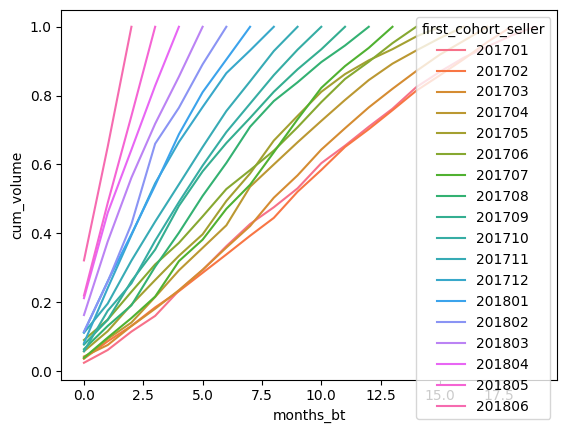

In [75]:
df_aux = (
    df_time_between_activities
    .query('(first_cohort_seller>=201701)&(first_cohort_seller<=201806)')
    .sort_values(['first_cohort_seller','months_bt'])
    .groupby(['first_cohort_seller','months_bt'], as_index=False)
    .agg(
        volume = ('first_cohort_seller','count'),
    )
    .assign(
        cum_volume = lambda df: df.groupby('first_cohort_seller').volume.transform('cumsum')/df.groupby('first_cohort_seller').volume.transform('sum')
    )
    .astype({"first_cohort_seller":"string","months_bt":"int","volume":"int","cum_volume":"float"})
)
sns.lineplot(data=df_aux, x="months_bt", y='cum_volume', hue="first_cohort_seller",)

<Axes: xlabel='limit'>

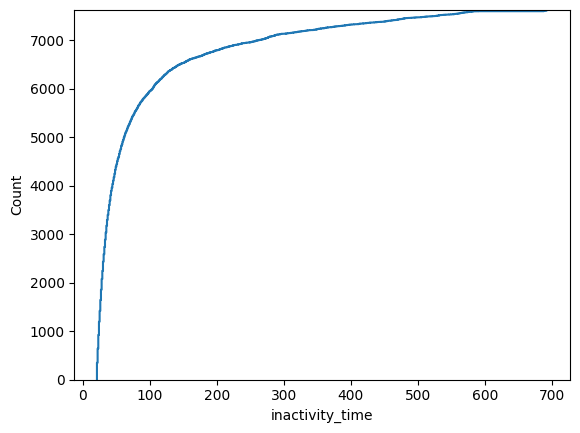

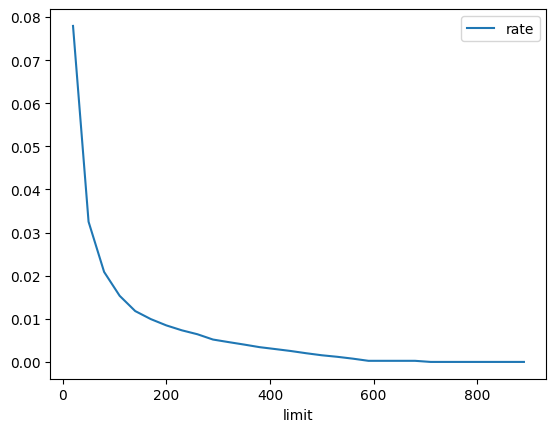

In [159]:
rates = []
inf_lim = 20
limits = list(range(inf_lim,900,30))
sns.ecdfplot(data=df_time_between_activities.query(f'inactivity_time>{inf_lim}'),x="inactivity_time",stat='count')
for i,limit in enumerate(limits):
    n_sell = (df_time_between_activities.inactivity_time>limit).mean()
    rates.append(n_sell)
pd.DataFrame({'limit':limits,'rate': rates}).plot(x='limit',y='rate')

<Axes: xlabel='inactivity_time', ylabel='Proportion'>

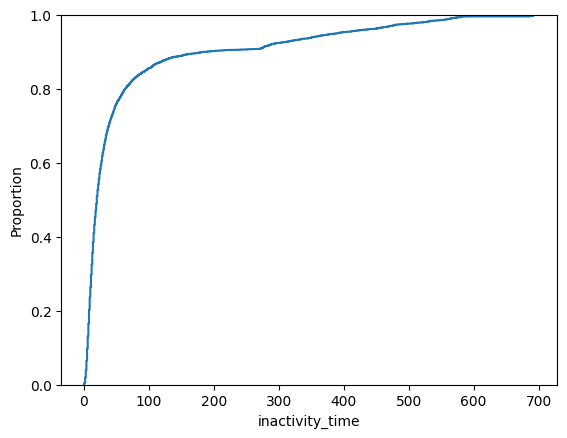

In [11]:
df_aux = (
    df_time_between_activities
    .query('order_purchase_timestamp<"2017-12-01"')
    .groupby(['seller_id','cohort_info'], as_index=False)
    .inactivity_time.max()
)
sns.ecdfplot(data=df_aux,x="inactivity_time")

<Axes: xlabel='limit'>

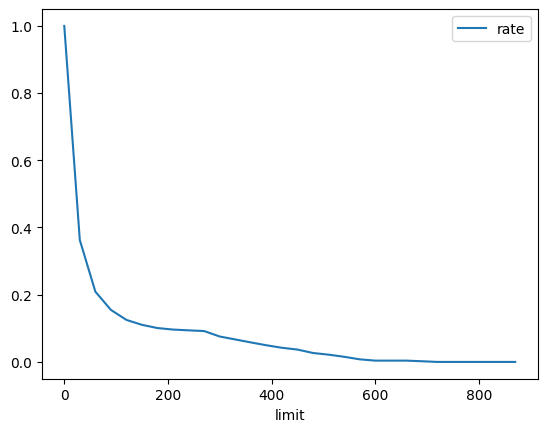

In [12]:
rates = []
limits = list(range(0,900,30))
for i,limit in enumerate(limits):
    n_sell = (df_aux.inactivity_time>limit).mean()
    rates.append(n_sell)
pd.DataFrame({'limit':limits,'rate': rates}).plot(x='limit',y='rate')

# Análise de recuperação: alternativa 1

In [170]:
display(
    df_time_between_activities
    .query('order_purchase_timestamp<"2017-12-01"')
    .groupby(['seller_id','cohort_info'],as_index=False)
    .inactivity_time.max()
    .sort_values('inactivity_time',ascending=False)
    .reset_index(drop=True)
    .dropna(subset=['inactivity_time'])
    .assign(
        cum_vol = lambda df: pd.Series([1]*len(df)).cumsum(),
        faixas = lambda df: pd.cut(df.inactivity_time, bins=[-1,15,30,60,90,120,150,
                                                             180,210,240,
                                                             df.inactivity_time.max()+1])
    )
    .groupby('faixas', observed=False, as_index=False).cum_vol.max()
    .assign(
        post_vol = lambda df: df.cum_vol.shift(-1),
        recovery = lambda df: (df.cum_vol - df.post_vol)/df.cum_vol,
        advance = lambda df: 1-df.recovery,
    )
)
print('Por essa análise percebemos que os clientes que chegam ao 150 ou 180 dias de inatividade')
print('90 a 95% avançam para períodos maiores de inatividade ')
print('Isto é, clientes com 150 ou 180 dias de inatividade tem baixa chance de ralizar um nova venda')
print('Assim o churn pode ser definido com 150 ou 180 dias de inatividade')

,faixas,cum_vol,post_vol,recovery,advance
0,"(-1, 15]",6483,3825.0,0.409995,0.590005
1,"(15, 30]",3825,2350.0,0.385621,0.614379
2,"(30, 60]",2350,1355.0,0.423404,0.576596
3,"(60, 90]",1355,1003.0,0.259779,0.740221
4,"(90, 120]",1003,810.0,0.192423,0.807577
5,"(120, 150]",810,715.0,0.117284,0.882716
6,"(150, 180]",715,653.0,0.086713,0.913287
7,"(180, 210]",653,624.0,0.044410,0.955590
8,"(210, 240]",624,609.0,0.024038,0.975962
9,"(240, 695]",609,NaN,NaN,NaN


Por essa análise percebemos que os clientes que chegam ao 150 ou 180 dias de inatividade
90 a 95% avançam para períodos maiores de inatividade 
Isto é, clientes com 150 ou 180 dias de inatividade tem baixa chance de ralizar um nova venda
Assim o churn pode ser definido com 150 ou 180 dias de inatividade


# Análise de recuperação: alternativa 2

In [51]:

(
    df_time_between_activities[['seller_id','cohort_info','first_cohort_seller']]
    .query('cohort_info<201707')
    .drop_duplicates(subset=['seller_id','cohort_info'])
    .assign(
        next_1_order_cohort = lambda df: df.groupby('seller_id')['cohort_info'].shift(-1).fillna(df.cohort_info.max()),
        # next_2_order_cohort = lambda df: df.groupby('seller_id')['cohort_info'].shift(-2).fillna(df.cohort_info.max()),
        mt_bt = lambda df: months_between_cohort(df.cohort_info,df.next_1_order_cohort)
    )
    .groupby('mt_bt')
    .agg(
        volume = ('mt_bt','count')
    )
    .reset_index()
    .sort_values('mt_bt', ascending=False)
    .assign(
        cum_volume = lambda df: df.volume.cumsum(),
        next_volume = lambda df: df.cum_volume.shift(),
        recovery = lambda df: (df.cum_volume - df.next_volume)/df.cum_volume,
        advanced = lambda df: df.next_volume/df.cum_volume,
    )
    .sort_values('mt_bt', ascending=True)
)

,mt_bt,volume,cum_volume,next_volume,recovery,advanced
0,0,519,2797,2278.0,0.185556,0.814444
1,1,1727,2278,551.0,0.758121,0.241879
2,2,233,551,318.0,0.422868,0.577132
3,3,165,318,153.0,0.518868,0.481132
4,4,93,153,60.0,0.607843,0.392157
5,5,26,60,34.0,0.433333,0.566667
6,6,5,34,29.0,0.147059,0.852941
7,7,1,29,28.0,0.034483,0.965517
8,8,28,28,NaN,NaN,NaN


# Análise de recuperação: alternativa 3

In [126]:
df_aux = (
    df_time_between_activities[['seller_id','first_cohort_seller']]
    .drop_duplicates()
    .assign(
        last_cohort = df_time_between_activities.cohort_info.max(),
        all_cohorts = lambda df: df.apply(lambda x: (
            list_cohort_between(x,start_cohort_col='first_cohort_seller',end_cohort_col='last_cohort')
        ),axis=1)
    )
    .drop(columns=['first_cohort_seller','last_cohort'])
    .explode('all_cohorts')
    .merge(
       df_time_between_activities[['seller_id','cohort_info']]
       .drop_duplicates(),
       right_on=['seller_id','cohort_info'],
       left_on=['seller_id','all_cohorts'],
       how='left'
    )
    .sort_values(['seller_id','all_cohorts'])
    .assign(
        flag_not_sell = lambda df: df.cohort_info.isna().astype(int),
        zero_group = lambda df: (df.flag_not_sell == 0).cumsum(),
        cum_sum_flag_sell = lambda df: df.groupby(['seller_id', 'zero_group']).flag_not_sell.cumsum()
    )
    .drop(columns='cohort_info')
    # .seller_id.value_counts()
    # .query('seller_id=="897060da8b9a21f655304d50fd935913"')
)
display(
    df_aux
    .cum_sum_flag_sell.value_counts()
    .reset_index(name='volume')
    .assign(
        post_volume = lambda df: df.volume.shift(-1),
        recovery = lambda df: (df.volume-df.post_volume)/df.volume,
        advance = lambda df: (df.post_volume)/df.volume,
    )
)

,cum_sum_flag_sell,volume,post_volume,recovery,advance
0,0,16068,3923.0,0.755850,0.244150
1,1,3923,2309.0,0.411420,0.588580
2,2,2309,1636.0,0.291468,0.708532
3,3,1636,1271.0,0.223105,0.776895
4,4,1271,1040.0,0.181747,0.818253
5,5,1040,888.0,0.146154,0.853846
6,6,888,779.0,0.122748,0.877252
7,7,779,672.0,0.137356,0.862644
8,8,672,590.0,0.122024,0.877976
9,9,590,488.0,0.172881,0.827119


# Análise de recuperação: alternativa 4
- depois de x meses sem vender quantos % voltam a vender?

In [171]:
recoveries_rates = {}
for i in range(1,23):
    volume = df_aux.query(f"cum_sum_flag_sell=={i}").count().seller_id
    n_recovery = pd.merge_asof(
        df_aux.query(f"cum_sum_flag_sell=={i}")
        .assign(
            dt_all_cohorts = lambda df: cohort_to_date(df.all_cohorts)
        )
        .sort_values('dt_all_cohorts'),
        df_aux.query("cum_sum_flag_sell==0")
        .assign(
            dt_all_cohorts = lambda df: cohort_to_date(df.all_cohorts)
        )
        .sort_values('dt_all_cohorts'),
        on='dt_all_cohorts',
        by='seller_id',
        direction='forward'
    ).query('all_cohorts_y.notna()').count().seller_id
    recoveries_rates[i]=(n_recovery/volume)
display(recoveries_rates)
print("Observa-se que a partir de 6 meses de inatividade a taxa de recuperação é inferior a 10%")


{
    1: 0.5643640071373949,
    2: 0.40883499350368124,
    3: 0.2823960880195599,
    4: 0.1974822974036192,
    5: 0.13942307692307693,
    6: 0.08333333333333333,
    7: 0.06803594351732992,
    8: 0.047619047619047616,
    9: 0.03898305084745763,
    10: 0.0389344262295082,
    11: 0.03263403263403263,
    12: 0.02981029810298103,
    13: 0.019417475728155338,
    14: 0.011278195488721804,
    15: 0.013043478260869565,
    16: 0.012121212121212121,
    17: 0.014925373134328358,
    18: 0.021505376344086023,
    19: 0.0,
    20: 0.0,
    21: 0.0,
    22: 0.0
}

Observa-se que a partir de 6 meses de inatividade a taxa de recuperação é inferior a 10%


# Conclusão
- As análises anteriores indicam uma definição de churn com 5 ou 6 meses de inatividade
- Aqui, adotaremos que o cliente "deu churn" com 6 meses de inatividade, portanto usaremos essa definição para a marcação da target.